In [1]:
import torch 
import matplotlib.pyplot as plt 
import os 
import pickle
from pathlib import Path 
import json

In [2]:
info = pickle.load(open('diversevul_graph_info.pkl', 'rb'))
info_hash = {}
info_file = {}
for d in info:
    info_hash[d['hash']] = d
    file = d['commit_id'] +'_'+str(d['hash'])+'_'+str(d['target'])+'.cpg.pt'
    info_file[file] = d

In [105]:
len(os.listdir('codegraphs'))

# find codegraphs/diversevul/processed/ -maxdepth 1 -print0 | xargs -0 -I{} mv {} codegraphs/

329783

In [3]:
folder = Path('v2_directed_withdegreecount') 
files = os.listdir(folder)
len(set(info_file.keys()) - set(files))

711

In [ ]:
# so 709 graphs are missing

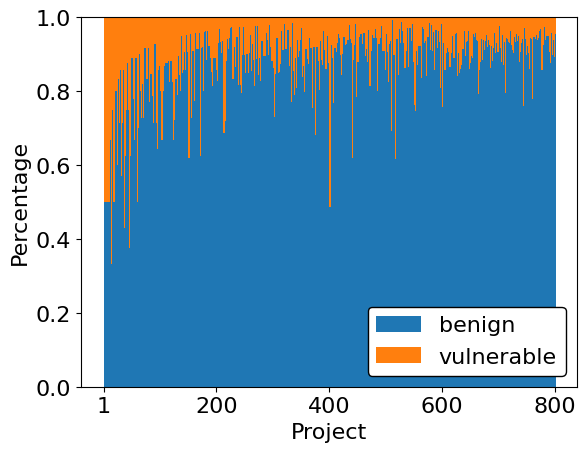

In [4]:
# label count per project 
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)
# make the font size also large of the x and y axis set_ylabel
# make it large



label_count = {}
for f in files:
    d = info_file[f]
    project = d['project']
    if project not in label_count:
        label_count[project] = [0,0]
    
    label = d['target']
    label_count[project][label] += 1
    
# print stats for top 10 largest and 10 smallest projects in percent
label_count_percent = {}
for project in label_count:
    label_count_percent[project] = [label_count[project][0]/sum(label_count[project]), label_count[project][1]/sum(label_count[project])]
    

a = sorted(label_count_percent.items(), key=lambda x: sum(label_count[x[0]]), reverse=False)
# b = sorted(label_count_percent.items(), key=lambda x: sum(label_count[x[0]]), reverse=False)[:10]
# print(a)
# print(b)
# filter projects with less than 5 samples

# plot bar, one bar per project, ordered per project size, with the percentage of each label
projects = [x[0] for x in a]
percentages = [x[1] for x in a]
labels = ['benign', 'vulnerable']
benign = [x[0] for x in percentages]
vul = [x[1] for x in percentages]

fig, ax = plt.subplots()
ax.bar(projects, benign, label='benign', color='#1F77B4')
ax.bar(projects, vul, bottom=benign, label='vulnerable', color='#FF7F0E')

# title 
# ax.set_title('Percentage of benign and vulnerable samples per project', y = 1.05)
# some space for title padding
# change bar withds 
for i in range(len(ax.patches)):
    ax.patches[i].set_width(2)
    ax.patches[i].set_x(ax.patches[i].get_x() + 2)
    ax.patches[i].set_linewidth(2)
ax.set_ylabel('Percentage')
ax.set_xlabel('Project')
ax.legend()
# plt.xticks(rotation=90)

leg = ax.legend(loc='lower right')
leg.get_frame().set_edgecolor('black')
# background white of legend white
leg.get_frame().set_facecolor('white')
# set backgrond non-transparent
leg.get_frame().set_alpha(1)

ax.set_xticks([1,200,400, 600, 800])
ax.set_xticklabels(['1','200','400','600', '800'])


plt.savefig(f"proj_vs_vuln_wotitle.png", dpi=300, bbox_inches='tight')
plt.show()


In [35]:
len(label_count)


800

In [127]:
# save label_count_percent to pt
torch.save(label_count_percent, 'PLOT_labelpercentage_vs_project.pt')

In [5]:
sizes = [ size for k,size in project_sizes.items()]
min(sizes)

NameError: name 'project_sizes' is not defined

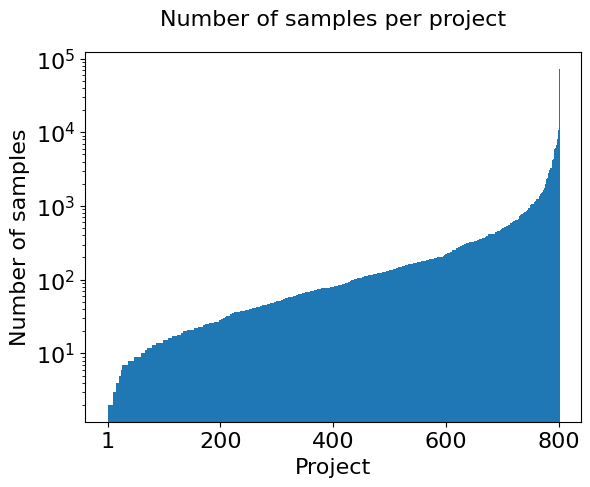

In [ ]:
project_sizes = {k: sum(v) for k,v in label_count.items()}
a = sorted(project_sizes.items(), key=lambda x: x[1], reverse=False)
projects = [x[0] for x in a]
sizes = [x[1] for x in a]

fig, ax = plt.subplots()
ax.bar(projects, sizes)

# Set y-axis to log scale
ax.set_yscale('log')

ax.set_ylabel('Number of samples')
ax.set_xlabel('Project')
ax.set_xticks([1,200,400,600, 800])
ax.set_xticklabels(['1','200','400','600', '800'])
ax.set_title('Number of samples per project', y = 1.05)
for i in range(len(ax.patches)):
    ax.patches[i].set_width(2)
    ax.patches[i].set_x(ax.patches[i].get_x() + 2)
    ax.patches[i].set_linewidth(2)
    
plt.savefig(f"proj_vs_numsamples_logscale.png", dpi=300, bbox_inches='tight')
plt.show()
# save file
torch.save(project_sizes, 'PLOT_project_sizes.pt')

In [6]:
# plot graph size vs project
from tqdm.auto import tqdm
graph_size = {}

if not os.path.exists('PLOT_graph_sizes.pt'):
    for file in tqdm(files):
        # if file does not exist
        
        try:
            data_obj = torch.load(folder / file)
        except BaseException as e:
            print(file,e)
            continue
        try:
            graph_size[file] = data_obj['x'].shape[0]
        except TypeError as e:
            print(file,e)
            pass 
        
    # save graph_sizes 
    torch.save(graph_size, 'PLOT_graph_sizes.pt')
else:
    graph_size = torch.load('PLOT_graph_sizes.pt')

/opt/conda/envs/pyg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# # rm graphs


# # plot graph size vs project
# from tqdm.auto import tqdm
# # graph_size = {}
# for file in tqdm(files):
#     # if file does not exist
    
#     try:
#         data_obj = torch.load(folder / file)
#     except BaseException as e:
#         print(file,e)
#         try:
#             # remove file
#             os.remove(folder / file)
#         except BaseException as e:
#             print(file,e)
#         continue
#     try:
#         a = data_obj['x'].shape[0]
#     except TypeError as e:
#         print(file,e)
#         # remove file
#         os.remove(folder / file)
#         pass 

  1%|          | 2270/329782 [00:07<10:27, 522.00it/s]

08c7ab404f69d9c4ca6ca7a9cf7eec74c804f917_90815471708475479496487751535965609051_0.cpg.pt 


  2%|▏         | 8129/329782 [00:18<10:29, 510.79it/s]

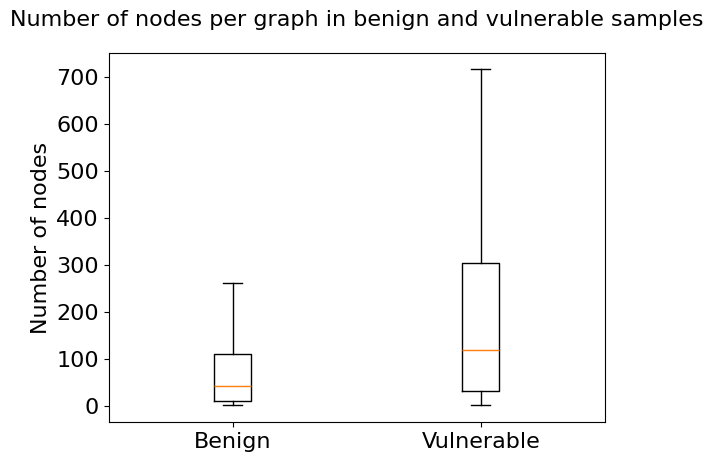

Statistics=2025189651.500, p=0.0000000000


In [7]:
# categorize graph counts by label
benign = []
vul = []
for s,size in graph_size.items():
    label = info_file[s]['target']
    if label == 0:
        benign.append(size)
    else:
        vul.append(size)

# make boxplot comparing both
# changed width

fig, ax = plt.subplots()
ax.boxplot([benign, vul], showfliers=False)
ax.set_ylabel('Number of nodes')
# ax.set_xlabel('Label')
ax.set_xticklabels(['Benign', 'Vulnerable'])
# set the orange median to color blue 
# plt.setp(ax.artists[0], edgecolor = 'b')
# set ax width
ax.set_title('Number of nodes per graph in benign and vulnerable samples', y = 1.05)
plt.savefig(f"label_vs_numnodes.png", dpi=300, bbox_inches='tight')
plt.show()

# save 
data = {'benign': benign, 'vul': vul}
torch.save(data, 'PLOT_graph_sizes_vs_vul_benign_wotitle.pt')   

# get significance of difference between benign and vul
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(benign, vul)
print('Statistics=%.3f, p=%.10f' % (stat, p))
 

## According to mann whitney u test, taking y=0 and y=1  they are different distributions https://www.statstest.com/mann-whitney-u-test/

In [83]:
del sorted

In [8]:
# plot graph size vs project
from tqdm.auto import tqdm
project_graph_sizes = {}
for f, s in tqdm(graph_size.items()):
    project = info_file[f]['project']
    if project not in project_graph_sizes:
        project_graph_sizes[project] = []
    project_graph_sizes[project].append(s)

# sort project graph sizes by length of the project
sorteds = []
for k,v in project_graph_sizes.items():
    sorteds.append((k,v))
sorteds = sorted(sorteds, key=lambda x: len(x[1]), reverse=False)
    
# x = list(project_graph_sizes.keys())
# y = [np.median(project_graph_sizes[k]) for k in x]

# x = [k for k,v in sorteds]
# y = [np.median(v) for k,v in sorteds]

# colors = []
# labels = []
# # color dots purple if y <5
# for i in range(len(y)):
#     if y[i] < 10:
#         colors.append('purple')
#         # labels.append('n<10')
#     else:
#         colors.append('#1F77B4')
#         # labels.append('n≥10')
    
# # opacity
# opacity = 0.5


# # scatter plot

# # plt.scatter(range(len(x)), y, label='Median', alpha=opacity)
# plt.scatter(range(len(x)), y, label=labels, alpha=opacity, c=colors)
# # add leggedn
# plt.legend()
# Separate the data into two categories
x1, y1, x2, y2 = [], [], [], []

for i in range(len(y)):
    if y[i] < 10:
        x1.append(i)
        y1.append(y[i])
    else:
        x2.append(i)
        y2.append(y[i])

# Scatter plot for each category with a label
plt.scatter(x1, y1, alpha=opacity, color='purple', label='n<10')
plt.scatter(x2, y2, alpha=opacity, color='#1F77B4', label='n≥10')

# Create a legend
leg = plt.legend()
# range of y
plt.ylim(0, 400)

leg.get_frame().set_edgecolor('black')
# background white of legend white
leg.get_frame().set_facecolor('white')
# set backgrond non-transparent
leg.get_frame().set_alpha(1)

plt.xlabel('Project')
plt.ylabel('Median number of nodes')
# plt.title('Median graph size per project', y = 1.05)
# plt xticks 1, 200, 400, 600, 800

plt.xticks([1,200,400,600, 800], ['1','200','400','600', '800'])

plt.savefig(f"mediannumnodes_vs_projectsize_wotitle_ge.png", dpi=300, bbox_inches='tight')
# save 
# data = {'x': x, 'y': y}
# torch.save(data, 'PLOT_graph_sizes_vs_project_size.pt')

  0%|          | 0/329737 [00:00<?, ?it/s]

100%|██████████| 329737/329737 [00:00<00:00, 683309.92it/s]


NameError: name 'y' is not defined

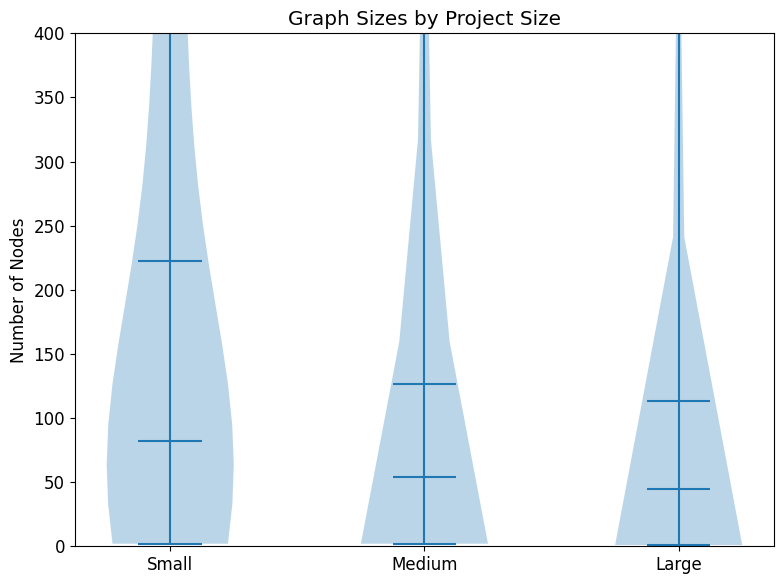

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Bin projects into small, medium, and large
small_projects = []
medium_projects = []
large_projects = []

for project, sizes in project_graph_sizes.items():
    project_size = len(sizes)
    if project_size < 10:
        small_projects.extend(sizes)
    elif project_size < 50:
        medium_projects.extend(sizes)
    else:
        large_projects.extend(sizes)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot violin plots
ax.violinplot([small_projects, medium_projects, large_projects],
              showmeans=True, showmedians=True)

# Set labels and title
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Small', 'Medium', 'Large'])
ax.set_title('Graph Sizes by Project Size')
ax.set_ylabel('Number of Nodes')

# y lim
plt.ylim(0, 400)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

109912 109912 109913


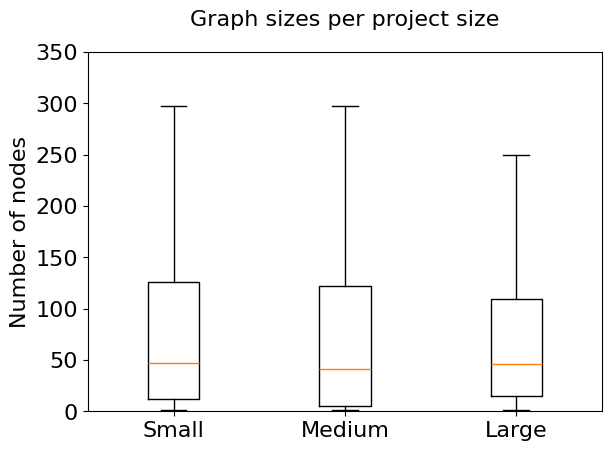

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# Sort projects based on their sizes
sorted_projects = sorted(project_graph_sizes.items(), key=lambda x: len(x[1]))


# Bin projects into three equally sized bins
projects = []

for project, sizes in sorted_projects:
    projects.extend(sizes) 

n = len(projects)
small_projects = projects[:n//3]
medium_projects = projects[n//3:2*n//3]
large_projects = projects[2*n//3:]


print(len(small_projects), len(medium_projects), len(large_projects))
# Create figure and axis
fig, ax = plt.subplots()


# Apply seaborn style
# sns.set_style("darkgrid")

# Plot violin plots
# ax = sns.violinplot(data=[small_projects, medium_projects, large_projects],
#                     palette="muted", ax=ax, bw=0.8)

# plot boxplots
ax.boxplot([small_projects, medium_projects, large_projects], showfliers=False)

# Set labels and title
ax.set_xticklabels(['Small', 'Medium', 'Large'])
ax.set_title('Graph sizes per project size', y = 1.05)
ax.set_ylabel('Number of nodes')

# Set y-axis limits
ax.set_ylim(0, 350)

# Adjust layout and display plot
plt.tight_layout()
plt.savefig(f"graphsize_vs_projectsize.png", dpi=300, bbox_inches='tight')
plt.show()